#LAB 8 : Classification

  1. Support Vector Machines 
  2. K-Nearest Neighbors
  3. Classification on MNIST Digit 

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 7)

#Support Vector Machines (SVM)



1. Try to maximize the margin of separation between data.
2. Instead of learning wx+b=0  separating hyperplane directly (like logistic regression), SVM try to learn wx+b=0, such that, the margin between two hyperplanes wx+b=1 and wx+b=-1 (also known as support vectors) is maximum. 
3. Margin between wx+b=1 and wx+b=-1 hyperplane is $\frac{2}{||w||}$
4. we have a constraint optimization problem of maximizing $\frac{2}{||w||}$, with constraints wx+b>=1 (for +ve class) and wx+b<=-1 (for -ve class).
5. As $y_{i}=1$ for +ve class and $y_{i}=-1$ for -ve class, the constraint can be re-written as:
$$y(wx+b)>=1$$

6. Final optimization is (i.e to find w and b):
$$\min_{||w||}\frac{1}{2}||w||,$$
$$y(wx+b) \geq 1,~\forall ~data $$



Acknowledgement:

https://pythonprogramming.net/predictions-svm-machine-learning-tutorial/

https://medium.com/deep-math-machine-learning-ai/chapter-3-1-svm-from-scratch-in-python-86f93f853dc

## Data generation:
1. Generate 2D gaussian data with fixed mean and variance for 2 class.(var=Identity, class1: mean[-4,-4], class2: mean[1,1], No. of data 25 from each class)
2. create the label matrix
3. Plot the generated data

(50, 2)
(50,)


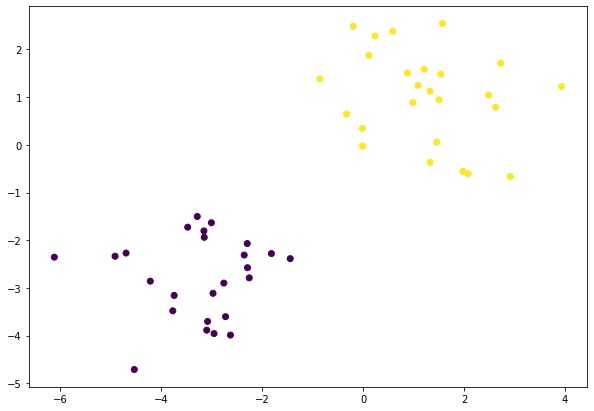

In [134]:
No_sample=50
mean1=np.array([-3,-3])
var1=np.array([[1,0],[0,1]])
mean2=np.array([1,1])
var2=var1
data1=np.random.multivariate_normal(mean1,var1,int(No_sample/2))
data2=np.random.multivariate_normal(mean2,var2,int(No_sample/2))
_X=np.concatenate((data1,data2))
print(_X.shape)
_y=np.concatenate((-1*np.ones(data1.shape[0]),np.ones(data2.shape[0])))
print(_y.shape)

plt.figure()
plt.scatter(_X[:,0],_X[:,1],marker='o',c=_y)

Create a data dictionary, which contains both label and data points.

In [135]:
## Write your code here

positiveX = _X[_y==1]
negativeX = _X[_y==-1]

#our data dictionary
data_dict = {-1:negativeX, 1:positiveX}

## SVM training
1. create a search space for w (i.e w1=w2),[0, 0.5*max((abs(feat)))] and  for b, [-max((abs(feat))),max((abs(feat)))], with appropriate step.
2. we will start with a higher step and find optimal w and b, then we will reduce the step and again re-evaluate the optimal one.

3. In each step, we will take transform of w, [1,1], [-1,1],[1,-1] and [-1,-1] to search arround the w. 

4. In every pass (for a fixed step size) we will store all the w, b and its corresponding ||w||, which make the data correctly classified as per the condition $y(wx+b) \geq 1$. 

5. Obtain the optimal hyperplane having minimum ||w||.

6. Start with the optimal w and repeat the same (step 3,4 and 5) for a reduced step size.


In [136]:
# it is just a searching algorithem, not a complicated optimization algorithem, (just for understanding of concepts through visualization)

def SVM_Training(data_dict):

    w_norms = {}
    transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]

    max_val=np.max(np.abs(np.concatenate([data_dict[1], data_dict[-1]]))) 
    steps = [max_val * 0.1, max_val * 0.01, max_val * 0.001]

    b_step = 3
    b_increment = 6
    w_opt = max_val*0.5

    for step in steps:
        w = np.array([w_opt, w_opt])     
        is_complete = False
        while not is_complete:
            for b in np.arange(-1*(max_val*b_step), max_val*b_step, step*b_increment):
                for transformation in transforms:
                    w_t = w*transformation
                    is_correct = True
                    for key in data_dict:
                        for val in data_dict[key]:
                            if key*(np.dot(w_t,val)+b) < 1:
                                is_correct = False
                                break
                        if not is_correct: break
                    if is_correct:
                        w_norms[np.linalg.norm(w_t)] = [w_t,b]
            
            if w[0] < 0:
                is_complete = True
            else:
                w -= step

        norms = sorted([n for n in w_norms])
        
        min_cost = w_norms[norms[0]]
        w = min_cost[0]
        b = min_cost[1]
        
        w_optimum = w[0]
    
    return w,b


**Training**

In [137]:

w=[] # Weights 2 dimensional vector
b=[] # Bias
w,b=SVM_Training(data_dict)
print(w)
print(b)

[0.53216652 0.53216652]
1.0276319073891784


## Visualization of the SVM separating hyperplanes (after training)

In [138]:
def visualize(data_dict):
       
        plt.scatter(_X[:,0], _X[:,1],marker='o',c=_y)

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane_value(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        
        hyp_x_min = np.min([np.min(data_dict[1]),np.min(data_dict[-1])])
        hyp_x_max = np.max([np.max(data_dict[1]),np.max(data_dict[-1])])

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane_value(hyp_x_min, w, b, 1)
        psv2 = hyperplane_value(hyp_x_max, w, b, 1)
        plt.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
        nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
        plt.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane_value(hyp_x_min, w, b, 0)
        db2 = hyperplane_value(hyp_x_max, w, b, 0)
        plt.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        
        
        

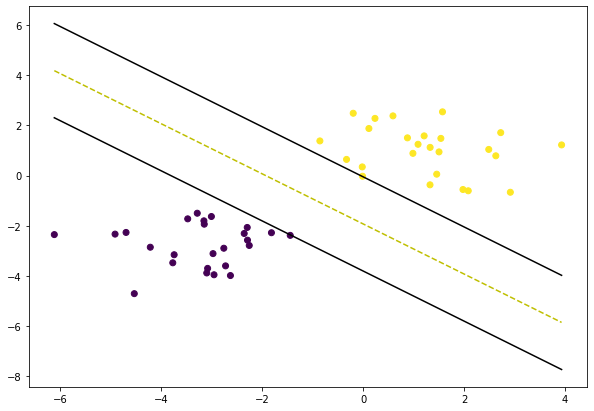

In [139]:
fig = plt.figure()
visualize(data_dict)

**Testing**

In [140]:
def predict(data,w,b):
  y_pred = np.ones(data.shape[0],)
  y_pred[data @ np.array(w) + b<0] = -1
  return y_pred

test accuracy= 1.0


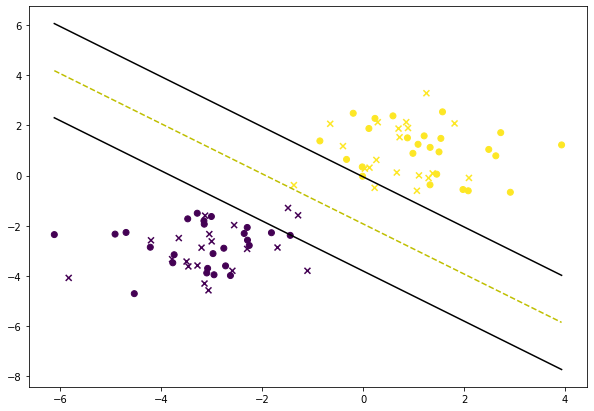

In [141]:
No_test_sample=40
data1=np.random.multivariate_normal(mean1,var1,int(No_test_sample/2))
data2=np.random.multivariate_normal(mean2,var2,int(No_test_sample/2))
test_data=np.concatenate((data1,data2))
y_gr=np.concatenate((-1*np.ones(data1.shape[0]),np.ones(data2.shape[0])))

# evaluate with the trained model

y_pred = predict(test_data, w, b)
accuracy = sum(y_gr==y_pred)/len(y_gr) # Write your code here
print('test accuracy=',accuracy)

#  Visualization
plt.figure()
visualize(data_dict)
plt.scatter(test_data[:,0],test_data[:,1],marker='x',c=y_gr)


**Use the Sci-kit Learn Package and perform Classification on the above dataset using the SVM algorithm**

In [142]:
## Write your code here
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(test_data, y_gr)
y_pred_svm = svm_model.predict(test_data)
test_accuracy_svm = svm_model.score(test_data, y_gr)
print('Test accuracy SVM = ', test_accuracy_svm*100)

Test accuracy SVM =  100.0


#K-Nearest Neighbours (KNN)

Text(0.5, 1.0, 'Data visualization')

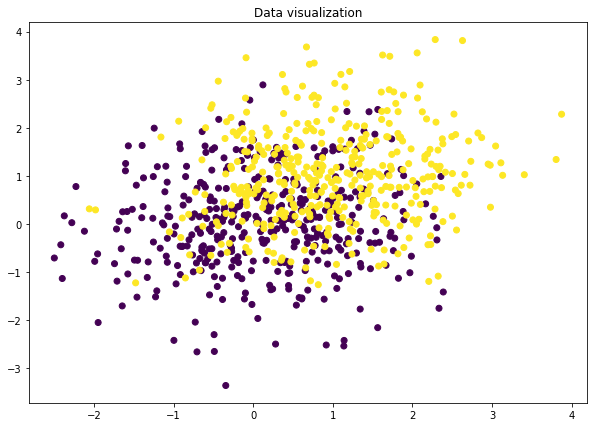

In [143]:
import numpy as np
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([1,1])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data_train=np.concatenate((data1[:-100,],data2[:-100]))
label=np.concatenate((np.zeros(data1.shape[0]-100),np.ones(data2.shape[0]-100)))

plt.figure()
plt.scatter(data_train[:,0],data_train[:,1],c=label)
plt.title('Data visualization')

In [144]:
def euclidean_distance(row1, row2):
  return np.linalg.norm(row1-row2)

In [145]:
def get_neighbors(train, label_train, test_row, num_neighbors):
  distances = list()
  M = train.shape[0]
  for i in range(M):
    train_data=train[i,:]
    label=label_train[i]
    dist = euclidean_distance(train_data, test_row)
    distances.append((train_data, dist, label))
  #Sort by Key [1] (dist)
  distances.sort(key=lambda x: x[1])
  return distances[:num_neighbors]


In [146]:
from statistics import mode
def predict_classification(neigbors):
  ## write your code here
  labels = [i[2] for i in neigbors]
  return mode(labels)


In [147]:
# test data generation
data_test=np.concatenate((data1[-100:],data2[-100:]))
label_test=np.concatenate((np.zeros(100),np.ones(100)))

In [148]:
K=2

pred_label=np.zeros(data_test.shape[0])
for i in range(data_test.shape[0]):
  neig=get_neighbors(data_train,label, data_test[i,:], K)
  pred_label[i]=predict_classification(neig)

accuracy=(len(np.where(pred_label==label_test)[0])/len(label_test))*100
print('Testing Accuracy=',accuracy,'%')

Testing Accuracy= 66.0 %


**Use the Sci-kit Learn Package and perform Classification on the above dataset using the K-Nearest Neighbour algorithm**

In [149]:
## Write your code here
from sklearn.neighbors import KNeighborsClassifier

knn_neigh = KNeighborsClassifier(n_neighbors=K)
knn_neigh.fit(data_test, label_test)
y_pred_knn = knn_neigh.predict(data_test)
test_accuracy_knn = knn_neigh.score(data_test, label_test)
print('Test accuracy KNN = ', test_accuracy_knn*100)

Test accuracy KNN =  81.5


#Classification on MNIST Digit Data

1. Read MNIST data and perform train-test split
2. Select any 2 Classes and perform classification task using SVM, KNN and Logistic Regression algorithms with the help of Sci-Kit Learn tool
3. Report the train and test accuracy and also display the results using confusion matrix
4. Repeat steps 2 and 3 for all 10 Classes and tabulate the results

In [150]:
# Import required modules
from sklearn import datasets
from sklearn.model_selection import train_test_split
import idx2numpy
from keras.utils import np_utils
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix as conf_mat

# Load MNIST Dataset

img_path = "t10k-images-idx3-ubyte" ## write your code here
label_path = "t10k-labels-idx1-ubyte" ## write your code here

Images = idx2numpy.convert_from_file(img_path)
labels = idx2numpy.convert_from_file(label_path)

# Convert it to a binary classification

def create_binary_dataset_and_predict(a, b):
    l1 = labels==a
    l2 = labels==b
    X = Images[np.logical_or(l1, l2)]
    y = labels[np.logical_or(l1, l2)]
    X = X.reshape(X.shape[0], -1)

    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

    print("====================================================================================================")
    # SVM
    svm_model = svm.SVC()
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)
    train_accuracy_svm = svm_model.score(X_train, y_train)
    test_accuracy_svm = svm_model.score(X_test, y_test)
    print('Train accuracy SVM = ', train_accuracy_svm*100)
    print('Test accuracy SVM = ', test_accuracy_svm*100)
    print('Confusion matrix for SVM =\n',conf_mat(y_test ,y_pred_svm))
    print("====================================================================================================")

    # KNN
    knn_neigh = KNeighborsClassifier(n_neighbors=3)
    knn_neigh.fit(X_train, y_train)
    y_pred_knn = knn_neigh.predict(X_test)
    train_accuracy_knn = knn_neigh.score(X_train, y_train)
    test_accuracy_knn = knn_neigh.score(X_test, y_test)
    print('Train accuracy KNN = ', train_accuracy_knn*100)
    print('Test accuracy KNN = ', test_accuracy_knn*100)
    print('Confusion matrix for KNN = \n',conf_mat(y_test ,y_pred_knn))
    print("====================================================================================================")

    # Logistic Regression
    lr_model = LogisticRegression(random_state=0).fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    train_accuracy_lr = lr_model.score(X_train, y_train)
    test_accuracy_lr = lr_model.score(X_test, y_test)
    print('Train accuracy Logistic Regression = ', train_accuracy_lr*100)
    print('Test accuracy Logistic Regression = ', test_accuracy_lr*100)
    print('Confusion matrix for Logistic Regression = \n',conf_mat(y_test ,y_pred_lr))
    print("====================================================================================================")

In [151]:
# Call above function
create_binary_dataset_and_predict(0,1)

Train accuracy SVM =  100.0
Test accuracy SVM =  100.0
Confusion matrix for SVM =
 [[197   0]
 [  0 226]]
Train accuracy KNN =  99.94089834515366
Test accuracy KNN =  100.0
Confusion matrix for KNN = 
 [[197   0]
 [  0 226]]
Train accuracy Logistic Regression =  100.0
Test accuracy Logistic Regression =  100.0
Confusion matrix for Logistic Regression = 
 [[197   0]
 [  0 226]]


In [152]:
create_binary_dataset_and_predict(2,3)

Train accuracy SVM =  99.8162890385793
Test accuracy SVM =  99.02200488997555
Confusion matrix for SVM =
 [[200   2]
 [  2 205]]
Train accuracy KNN =  99.4488671157379
Test accuracy KNN =  99.51100244498777
Confusion matrix for KNN = 
 [[200   2]
 [  0 207]]
Train accuracy Logistic Regression =  100.0
Test accuracy Logistic Regression =  96.33251833740832
Confusion matrix for Logistic Regression = 
 [[194   8]
 [  7 200]]


c:\Users\Shashank\.env\.mldev\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [153]:
create_binary_dataset_and_predict(4,5)

Train accuracy SVM =  100.0
Test accuracy SVM =  99.73333333333333
Confusion matrix for SVM =
 [[207   0]
 [  1 167]]
Train accuracy KNN =  100.0
Test accuracy KNN =  99.2
Confusion matrix for KNN = 
 [[207   0]
 [  3 165]]
Train accuracy Logistic Regression =  100.0
Test accuracy Logistic Regression =  98.66666666666667
Confusion matrix for Logistic Regression = 
 [[205   2]
 [  3 165]]


c:\Users\Shashank\.env\.mldev\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [154]:
create_binary_dataset_and_predict(6,7)

Train accuracy SVM =  100.0
Test accuracy SVM =  99.74874371859298
Confusion matrix for SVM =
 [[196   1]
 [  0 201]]
Train accuracy KNN =  100.0
Test accuracy KNN =  99.74874371859298
Confusion matrix for KNN = 
 [[196   1]
 [  0 201]]
Train accuracy Logistic Regression =  100.0
Test accuracy Logistic Regression =  99.2462311557789
Confusion matrix for Logistic Regression = 
 [[195   2]
 [  1 200]]


In [155]:
create_binary_dataset_and_predict(8,9)

Train accuracy SVM =  99.55863808322825
Test accuracy SVM =  99.49622166246851
Confusion matrix for SVM =
 [[188   1]
 [  1 207]]
Train accuracy KNN =  99.36948297604036
Test accuracy KNN =  99.24433249370277
Confusion matrix for KNN = 
 [[186   3]
 [  0 208]]
Train accuracy Logistic Regression =  100.0
Test accuracy Logistic Regression =  97.73299748110831
Confusion matrix for Logistic Regression = 
 [[182   7]
 [  2 206]]


c:\Users\Shashank\.env\.mldev\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Note : If you are interested, also try classifying MNIST digit data using the code you have written for SVM, KNN and Logistic Regression** 

  